In [612]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress


data = pd.read_csv("Market_Saturation_and_Utilization_State_County_Archive_Dataset_VA_ONLY.csv")
FRED_Data = pd.read_csv("VA_FRED_Corrected.csv")

counties_to_filter = ["Westmoreland", "Virginia Beach", "Newport News", "Richmond", "Nelson", "Botetourt", "Henrico", "Bath", "Roanoke", "Loudoun", "Rockingham"]

VA_Data = data[data['county'].isin(counties_to_filter)]

VA_Data = pd.DataFrame(VA_Data)

VA_Data = VA_Data.rename(columns={'reference_period': 'Date_Of_Use', 'type_of_service': 'Type_Of_Service', 'state':'State', 'county':'County', 'state_fips':'State_Fips','county_fips':'County_Fips', 'number_of_fee_for_service_beneficiaries':'Number_Of_Beneficiaries','number_of_providers': 'Number_Of_Providers', 'percentage_of_users_out_of_ffs_beneficiaries':'Percent_Users_Out_OF_FFS', 'number_of_users':'Number_Of_Users', 'average_number_of_providers_per_county':'Average_Providers_Per_County','total_payment':'Total_Payment'})

#Drop all except ...
columns_to_keep = ['Date_Of_Use','Type_Of_Service','State','County','State_Fips','County_Fips','Number_Of_Beneficiaries','Number_Of_Providers','Percent_Users_Out_OF_FFS','Number_Of_Users','Average_Providers_Per_County','Total_Payment']
VA_Cleaned = VA_Data.drop(columns=[col for col in VA_Data.columns if col not in columns_to_keep])

VA_Cleaned['Number_Of_Providers'] = pd.to_numeric(VA_Cleaned['Number_Of_Providers'], errors='coerce').fillna(0).astype(int)

VA_Cleaned.to_csv("VA_Cleaned.csv", index=False) 

VA_Cleaned.head()

,Date_Of_Use,Type_Of_Service,State,County,State_Fips,County_Fips,Number_Of_Beneficiaries,Number_Of_Providers,Percent_Users_Out_OF_FFS,Number_Of_Users,Average_Providers_Per_County,Total_Payment
9,2014-10-01 to 2015-09-30,Ambulance (Emergency & Non-Emergency),VA,Bath,51,17,"1,229",1,4.56%,56,1,"$49,982.91"
12,2014-10-01 to 2015-09-30,Ambulance (Emergency & Non-Emergency),VA,Botetourt,51,23,"6,877",8,13.23%,910,8,"$674,391.90"
43,2014-10-01 to 2015-09-30,Ambulance (Emergency & Non-Emergency),VA,Henrico,51,87,"43,763",15,7.46%,"3,265",15,"$2,828,672.22"
53,2014-10-01 to 2015-09-30,Ambulance (Emergency & Non-Emergency),VA,Loudoun,51,107,"29,297",15,7.29%,"2,137",15,"$1,284,524.92"
61,2014-10-01 to 2015-09-30,Ambulance (Emergency & Non-Emergency),VA,Nelson,51,125,"3,944",7,9.89%,390,7,"$485,339.37"


In [613]:
# Filter VA_Cleaned DataFrame 
filtered_df = VA_Cleaned[VA_Cleaned["Date_Of_Use"] == "2017-01-01 to 2017-12-31"]

# Calculate sum of healthcare providers and total payments for each county
date = "1/1/17"  
income_per_capita = FRED_Data.loc[FRED_Data["DATE"] == date, ["Westmoreland", "Virginia Beach", "Newport News", "Richmond", "Nelson", "Botetourt", "Henrico", "Bath", "Roanoke", "Loudoun", "Rockingham"]].values[0]

# Remove dollar sign and commas and convert Total_Payment to float
filtered_df.loc[:, "Total_Payment"] = filtered_df["Total_Payment"].str.replace('[$,]', '', regex=True).astype(float)
pd.options.display.float_format = '{:,.2f}'.format
#County Summary for 2017

county_summary_df_17 = pd.DataFrame({
    'County': ["Westmoreland", "Virginia Beach", "Newport News", "Richmond", "Nelson", "Botetourt", "Henrico", "Bath", "Roanoke", "Loudoun", "Rockingham"],
    'Healthcare_Providers_Sum': [
        filtered_df[filtered_df["County"] == "Westmoreland"]["Number_Of_Providers"].sum(),
        filtered_df[filtered_df["County"] == "Virginia Beach"]["Number_Of_Providers"].sum(),
        filtered_df[filtered_df["County"] == "Newport News"]["Number_Of_Providers"].sum(),
        filtered_df[filtered_df["County"] == "Richmond"]["Number_Of_Providers"].sum(),
        filtered_df[filtered_df["County"] == "Nelson"]["Number_Of_Providers"].sum(),
        filtered_df[filtered_df["County"] == "Botetourt"]["Number_Of_Providers"].sum(),
        filtered_df[filtered_df["County"] == "Henrico"]["Number_Of_Providers"].sum(),
        filtered_df[filtered_df["County"] == "Bath"]["Number_Of_Providers"].sum(),
        filtered_df[filtered_df["County"] == "Roanoke"]["Number_Of_Providers"].sum(),
        filtered_df[filtered_df["County"] == "Loudoun"]["Number_Of_Providers"].sum(),
        filtered_df[filtered_df["County"] == "Rockingham"]["Number_Of_Providers"].sum()
    ],
    'Total_Payments_Sum': [
        filtered_df[filtered_df["County"] == "Westmoreland"]["Total_Payment"].sum(),
        filtered_df[filtered_df["County"] == "Virginia Beach"]["Total_Payment"].sum(),
        filtered_df[filtered_df["County"] == "Newport News"]["Total_Payment"].sum(),
        filtered_df[filtered_df["County"] == "Richmond"]["Total_Payment"].sum(),
        filtered_df[filtered_df["County"] == "Nelson"]["Total_Payment"].sum(),
        filtered_df[filtered_df["County"] == "Botetourt"]["Total_Payment"].sum(),
        filtered_df[filtered_df["County"] == "Henrico"]["Total_Payment"].sum(),
        filtered_df[filtered_df["County"] == "Bath"]["Total_Payment"].sum(),
        filtered_df[filtered_df["County"] == "Roanoke"]["Total_Payment"].sum(),
        filtered_df[filtered_df["County"] == "Loudoun"]["Total_Payment"].sum(),
        filtered_df[filtered_df["County"] == "Rockingham"]["Total_Payment"].sum()
    ],
    'Income_Per_Capita': income_per_capita,
    'Population':  [17723,450417,184306,8882,14800,33355,328008,4270,93900,397192,80448],
})
county_summary_df_17['Payments_Per_Capita'] = county_summary_df_17['Total_Payments_Sum']/county_summary_df_17['Population']

# Print the resulting DataFrame
county_summary_df_17

,County,Healthcare_Providers_Sum,Total_Payments_Sum,Income_Per_Capita,Population,Payments_Per_Capita
0,Westmoreland,205,"22,173,017.42",41553,17723,"1,251.09"
1,Virginia Beach,1753,"335,192,620.70",54964,450417,744.18
2,Newport News,783,"143,523,934.85",39043,184306,778.73
3,Richmond,103,"9,991,173.19",35997,8882,"1,124.88"
4,Nelson,182,"21,764,346.23",48838,14800,"1,470.56"
5,Botetourt,276,"39,855,033.95",48145,33355,"1,194.87"
6,Henrico,1374,"248,833,724.16",63377,328008,758.62
7,Bath,53,"5,941,023.47",59958,4270,"1,391.34"
8,Roanoke,583,"109,554,286.68",40264,93900,"1,166.71"
9,Loudoun,1182,"155,281,846.00",76099,397192,390.95


In [614]:
summary_statistics = county_summary_df_17.describe()
summary_statistics

,Healthcare_Providers_Sum,Total_Payments_Sum,Income_Per_Capita,Population,Payments_Per_Capita
count,11.00,11.00,11.00,11.00,11.00
mean,627.73,"106,881,701.32","49,664.45","146,663.73","1,028.27"
std,575.34,"107,238,578.47","12,696.61","168,111.30",324.86
min,53.00,"5,941,023.47","35,997.00","4,270.00",390.95
25%,193.50,"21,968,681.82","39,653.50","16,261.50",768.67
50%,411.00,"83,587,707.83","48,145.00","80,448.00","1,124.88"
75%,982.50,"149,402,890.43","57,461.00","256,157.00","1,222.98"
max,"1,753.00","335,192,620.70","76,099.00","450,417.00","1,470.56"


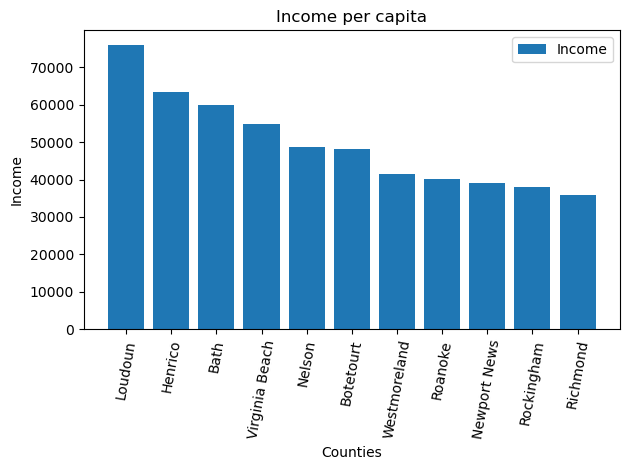

In [615]:
county_summary_df_17_income_sorted = county_summary_df_17.sort_values('Income_Per_Capita',ascending=False)

values1 = county_summary_df_17_income_sorted['Income_Per_Capita']  

# Reset index to match the sorted order
county_summary_df_17_income_sorted = county_summary_df_17_income_sorted.reset_index(drop=True)

plt.bar(county_summary_df_17_income_sorted['County'], values1, label='Income')

# labels, title, and legend
plt.xlabel('Counties')
plt.ylabel('Income')
plt.title('Income per capita')
plt.xticks(rotation=80)
plt.xticks(county_summary_df_17_income_sorted['County'])  # Use the sorted DataFrame for x-labels
plt.legend()
plt.savefig('Income_Per_Capita.jpeg')
plt.tight_layout()
plt.show()

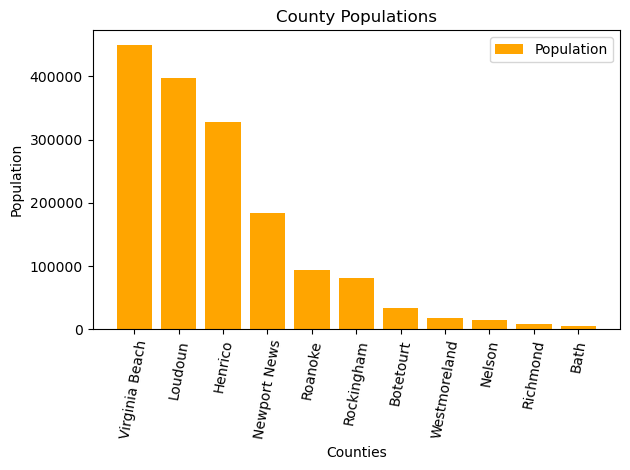

In [616]:
county_summary_df_17_pop_sorted = county_summary_df_17.sort_values('Population',ascending = False)

values1 = county_summary_df_17_pop_sorted['Population']  

# Reset the index to match the sorted order
county_summary_df_17_income_sorted = county_summary_df_17_income_sorted.reset_index(drop=True)


plt.bar(county_summary_df_17_pop_sorted['County'], values1, label='Population',color='orange')

# labels, title, and legend
plt.xlabel('Counties')
plt.ylabel('Population')
plt.title('County Populations')
plt.xticks(rotation=80)
plt.xticks(county_summary_df_17_pop_sorted['County'])  
plt.legend()
plt.savefig('CountyPopulations.jpeg')
plt.tight_layout()
plt.show()

The correlation coefficient between Income Per Capita and Total FFS Payments is 0.40


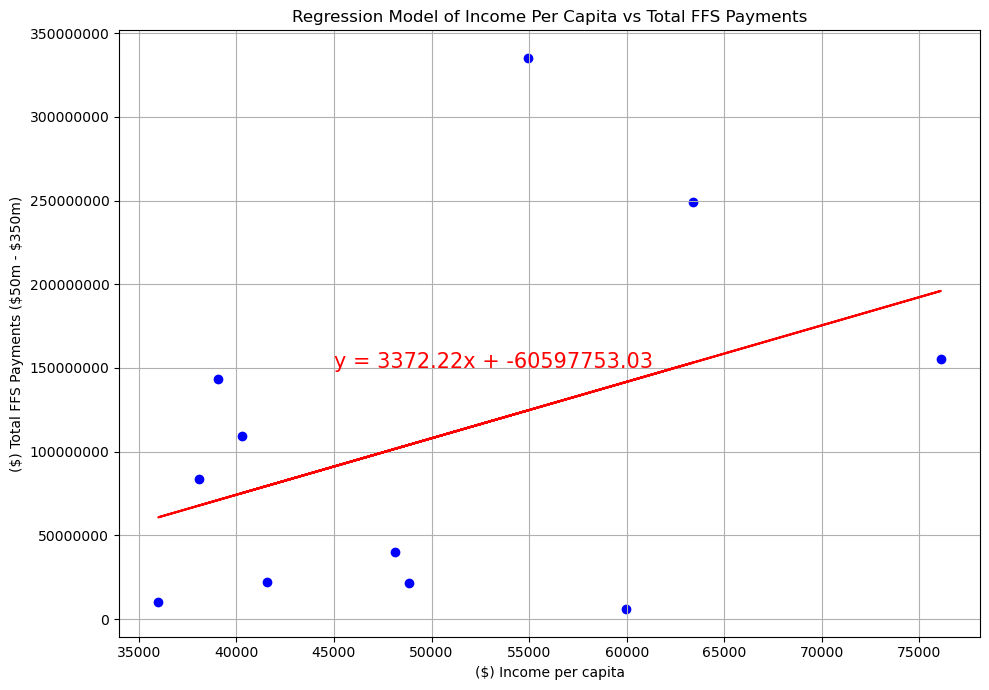

In [617]:
# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(county_summary_df_17['Income_Per_Capita'], county_summary_df_17['Total_Payments_Sum'])
regression_values = county_summary_df_17['Income_Per_Capita'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The correlation coefficient between Income Per Capita and Total FFS Payments is {rvalue:.2f}")

# Plot the data points and regression line
plt.figure(figsize=(10, 7))
plt.scatter(county_summary_df_17['Income_Per_Capita'], county_summary_df_17['Total_Payments_Sum'], color='blue')
plt.plot(county_summary_df_17['Income_Per_Capita'], regression_values, "r-")
plt.title('Regression Model of Income Per Capita vs Total FFS Payments')
plt.xlabel('($) Income per capita')
plt.ylabel('($) Total FFS Payments ($50m - $350m)')
plt.annotate(line_eq, (45000, 150000000), fontsize=15, color="red")
plt.grid(True)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.savefig("Regression Model of Income Per Capita vs Total FFS Payments.png")
plt.show()

The correlation coefficient between Income Per Capita and Total FFS Healthcare Providers is 0.52


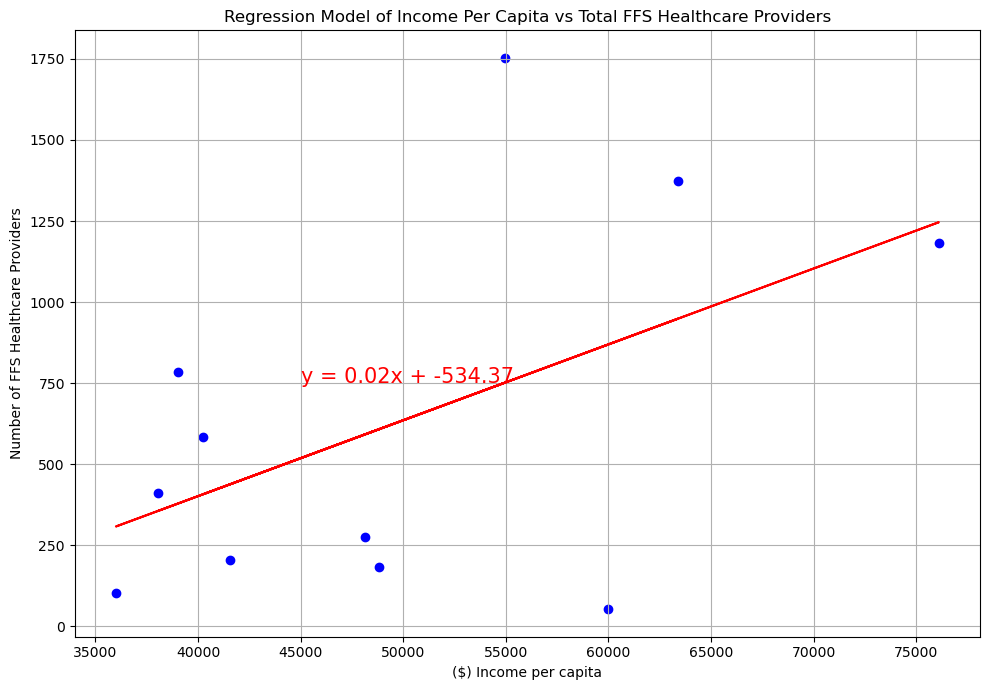

In [618]:
# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(county_summary_df_17['Income_Per_Capita'], county_summary_df_17['Healthcare_Providers_Sum'])
regression_values = county_summary_df_17['Income_Per_Capita'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The correlation coefficient between Income Per Capita and Total FFS Healthcare Providers is {rvalue:.2f}")

# Plot the data points and regression line
plt.figure(figsize=(10, 7))
plt.scatter(county_summary_df_17['Income_Per_Capita'], county_summary_df_17['Healthcare_Providers_Sum'], color='blue')
plt.plot(county_summary_df_17['Income_Per_Capita'], regression_values, "r-")
plt.title('Regression Model of Income Per Capita vs Total FFS Healthcare Providers')
plt.xlabel('($) Income per capita')
plt.ylabel('Number of FFS Healthcare Providers')
plt.annotate(line_eq, (45000, 750), fontsize=15, color="red")
plt.grid(True)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.savefig("Regression Model of Income Per Capita vs Total FFS Healthcare Providers.png")
plt.show()

The correlation coefficient between Income Per Capita and FFS Payments Per Capita is -0.51


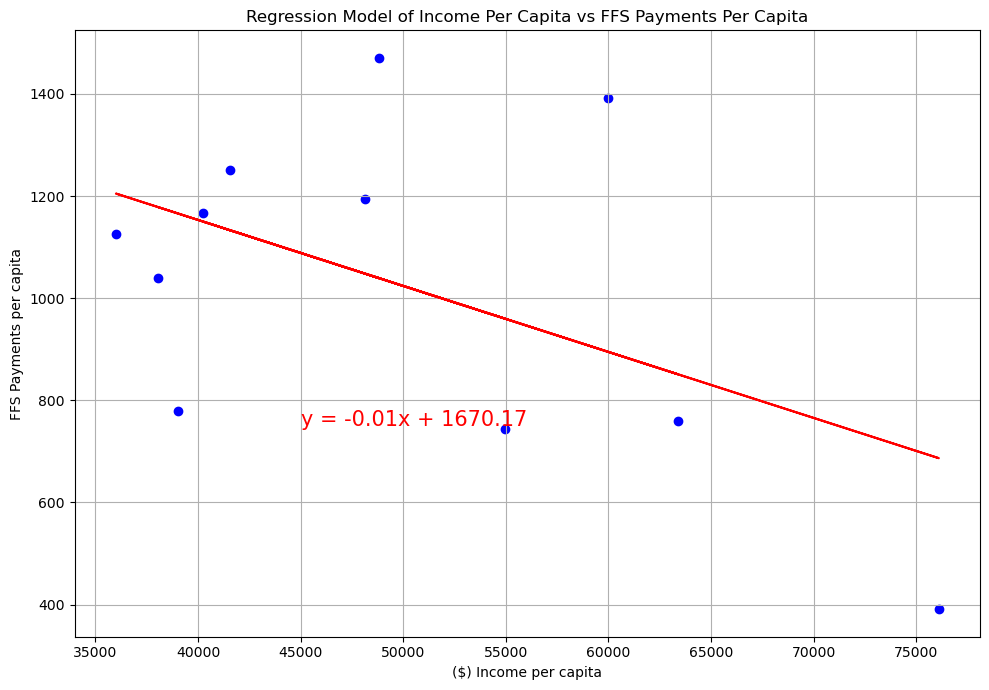

In [619]:
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(county_summary_df_17['Income_Per_Capita'], county_summary_df_17['Payments_Per_Capita'])
regression_values = county_summary_df_17['Income_Per_Capita'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The correlation coefficient between Income Per Capita and FFS Payments Per Capita is {rvalue:.2f}")

plt.figure(figsize=(10, 7))
plt.scatter(county_summary_df_17['Income_Per_Capita'], county_summary_df_17['Payments_Per_Capita'], color='blue')
plt.plot(county_summary_df_17['Income_Per_Capita'], regression_values, "r-")
plt.title('Regression Model of Income Per Capita vs FFS Payments Per Capita')
plt.xlabel('($) Income per capita')
plt.ylabel('FFS Payments per capita')
plt.annotate(line_eq, (45000, 750), fontsize=15, color="red")
plt.grid(True)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.savefig("Regression Model of Income Per Capita vs FFS Payments Per Capita.png")
plt.show()

In [620]:
#11 County DataFrames

# Westmoreland
Westmoreland_County_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Westmoreland"]
# Va Beach
Va_Beach_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Virginia Beach"]
# Newport News
Newport_News_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Newport News"]
# Richmond
Richmond_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Richmond"]
# Nelson County
Nelson_County_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Nelson"]
# Botetourt County
Botetourt_County_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Botetourt"]
# Henrico County
Henrico_County_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Henrico"]
# Falls Church
Bath_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Bath"]
# Roanoke County
Roanoke_County_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Roanoke"]
# Loudon County
Loudoun_County_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Loudoun"]
# Faifax County
Rockingham_df = VA_Cleaned.loc[VA_Cleaned["County"]=="Rockingham"]

In [621]:
fifteen_calendar_df=pd.DataFrame(VA_Cleaned.loc[VA_Cleaned["Date_Of_Use"]=="2015-01-01 to 2015-12-31"])
fifteen_calendar_df['Number_Of_Users'] = fifteen_calendar_df['Number_Of_Users'].str.replace(',', '').astype(int)
fifteen_calendar_df.head()

,Date_Of_Use,Type_Of_Service,State,County,State_Fips,County_Fips,Number_Of_Beneficiaries,Number_Of_Providers,Percent_Users_Out_OF_FFS,Number_Of_Users,Average_Providers_Per_County,Total_Payment
2406,2015-01-01 to 2015-12-31,Ambulance (Emergency & Non-Emergency),VA,Bath,51,17,"1,228",1,4.07%,50,1,"$43,457.29"
2409,2015-01-01 to 2015-12-31,Ambulance (Emergency & Non-Emergency),VA,Botetourt,51,23,"6,780",8,13.45%,912,8,"$696,197.75"
2440,2015-01-01 to 2015-12-31,Ambulance (Emergency & Non-Emergency),VA,Henrico,51,87,"43,161",16,7.48%,3229,16,"$2,812,159.01"
2450,2015-01-01 to 2015-12-31,Ambulance (Emergency & Non-Emergency),VA,Loudoun,51,107,"29,453",17,8.37%,2465,17,"$1,566,339.71"
2458,2015-01-01 to 2015-12-31,Ambulance (Emergency & Non-Emergency),VA,Nelson,51,125,"3,931",6,9.34%,367,6,"$469,847.17"


In [622]:
fifteen_grouped_service=fifteen_calendar_df.groupby(["Type_Of_Service","Date_Of_Use"])["Number_Of_Users"].sum()
fifteen_grouped_service.dropna()
fifteen_grouped_service
 

Type_Of_Service                               Date_Of_Use             
Ambulance (Emergency & Non-Emergency)         2015-01-01 to 2015-12-31     20434
Ambulance (Emergency)                         2015-01-01 to 2015-12-31     14660
Ambulance (Non-Emergency)                     2015-01-01 to 2015-12-31     11049
Cardiac Rehabilitation Program                2015-01-01 to 2015-12-31       957
Chiropractic Services                         2015-01-01 to 2015-12-31      5961
Clinical Laboratory (Billing Independently)   2015-01-01 to 2015-12-31    103099
Dialysis                                      2015-01-01 to 2015-12-31      1881
Federally Qualified Health Center (FQHC)      2015-01-01 to 2015-12-31      3138
Home Health                                   2015-01-01 to 2015-12-31     17468
Hospice                                       2015-01-01 to 2015-12-31      4343
Independent Diagnostic Testing Facility Pt A  2015-01-01 to 2015-12-31    110350
Independent Diagnostic Testing Facilit

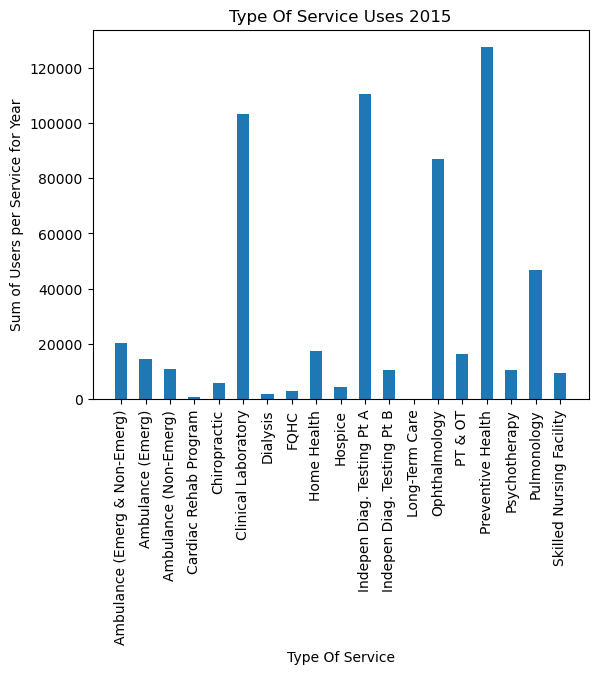

In [623]:
labels=['Ambulance (Emerg & Non-Emerg)', 'Ambulance (Emerg)', 'Ambulance (Non-Emerg)', 'Cardiac Rehab Program',
        'Chiropractic', 'Clinical Laboratory', 'Dialysis', 'FQHC',
        'Home Health','Hospice', 'Indepen Diag. Testing Pt A','Indepen Diag. Testing Pt B',
        'Long-Term Care', 'Ophthalmology', 'PT & OT', 'Preventive Health', 'Psychotherapy',
        'Pulmonology','Skilled Nursing Facility']

fifteen_calendar_df=pd.DataFrame(VA_Cleaned.loc[VA_Cleaned["Date_Of_Use"]=="2015-01-01 to 2015-12-31"])
fifteen_calendar_df['Number_Of_Users'] = fifteen_calendar_df['Number_Of_Users'].str.replace(',', '').astype(int)

fifteen_grouped_service=fifteen_calendar_df.groupby(["Date_Of_Use", "Type_Of_Service"])["Number_Of_Users"].sum()
fifteen_grouped_service.dropna()

plt.bar(x=labels, height=fifteen_grouped_service, width=0.5)
plt.ylabel("Sum of Users per Service for Year")
plt.xlabel("Type Of Service")
plt.title("Type Of Service Uses 2015")
#Rotate x-ticks to make more readable
plt.xticks(rotation=90)
plt.savefig("Type of Service Uses 2015")
plt.show()

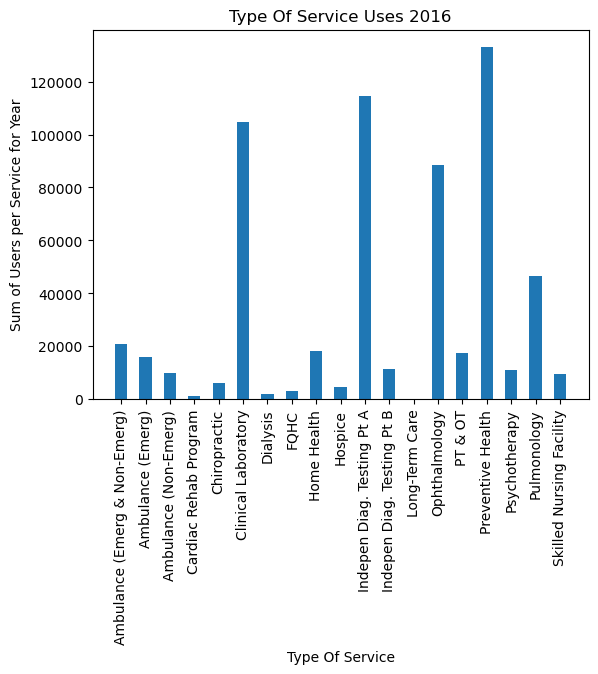

In [624]:
labels=['Ambulance (Emerg & Non-Emerg)', 'Ambulance (Emerg)', 'Ambulance (Non-Emerg)', 'Cardiac Rehab Program',
        'Chiropractic', 'Clinical Laboratory', 'Dialysis', 'FQHC',
        'Home Health','Hospice', 'Indepen Diag. Testing Pt A','Indepen Diag. Testing Pt B',
        'Long-Term Care', 'Ophthalmology', 'PT & OT', 'Preventive Health', 'Psychotherapy',
        'Pulmonology','Skilled Nursing Facility']

sixteen_calendar_df=pd.DataFrame(VA_Cleaned.loc[VA_Cleaned["Date_Of_Use"]=="2016-01-01 to 2016-12-31"])
sixteen_calendar_df['Number_Of_Users'] = sixteen_calendar_df['Number_Of_Users'].str.replace(',', '').astype(int)

sixteen_grouped_service=sixteen_calendar_df.groupby(["Date_Of_Use", "Type_Of_Service"])["Number_Of_Users"].sum()
sixteen_grouped_service.dropna()

plt.bar(x=labels, height=sixteen_grouped_service, width=0.5)
plt.ylabel("Sum of Users per Service for Year")
plt.xlabel("Type Of Service")
plt.title("Type Of Service Uses 2016")
#Rotate x-ticks to make more readable
plt.xticks(rotation=90)
plt.savefig("Type of Service Uses 2016")
plt.show()

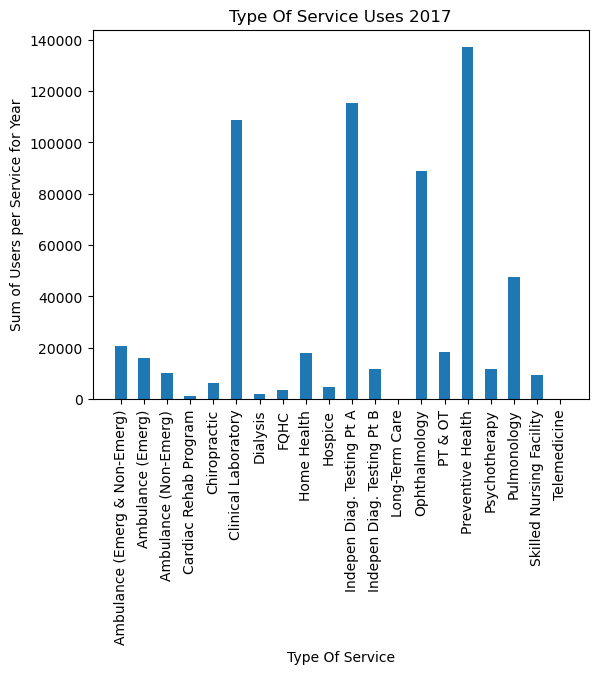

In [625]:
labels=['Ambulance (Emerg & Non-Emerg)', 'Ambulance (Emerg)', 'Ambulance (Non-Emerg)', 'Cardiac Rehab Program',
        'Chiropractic', 'Clinical Laboratory', 'Dialysis', 'FQHC',
        'Home Health','Hospice', 'Indepen Diag. Testing Pt A','Indepen Diag. Testing Pt B',
        'Long-Term Care', 'Ophthalmology', 'PT & OT', 'Preventive Health', 'Psychotherapy',
        'Pulmonology','Skilled Nursing Facility', 'Telemedicine']

seventeen_calendar_df=pd.DataFrame(VA_Cleaned.loc[VA_Cleaned["Date_Of_Use"]=="2017-01-01 to 2017-12-31"])
seventeen_calendar_df['Number_Of_Users'] = seventeen_calendar_df['Number_Of_Users'].str.replace(',', '').astype(int)

seventeen_grouped_service=seventeen_calendar_df.groupby(["Date_Of_Use", "Type_Of_Service"])["Number_Of_Users"].sum()
seventeen_grouped_service.dropna()

plt.bar(x=labels, height=seventeen_grouped_service, width=0.5)
plt.ylabel("Sum of Users per Service for Year")
plt.xlabel("Type Of Service")
plt.title("Type Of Service Uses 2017")
#Rotate x-ticks to make more readable
plt.xticks(rotation=90)
plt.savefig("Type of Service Uses 2017")
plt.show()

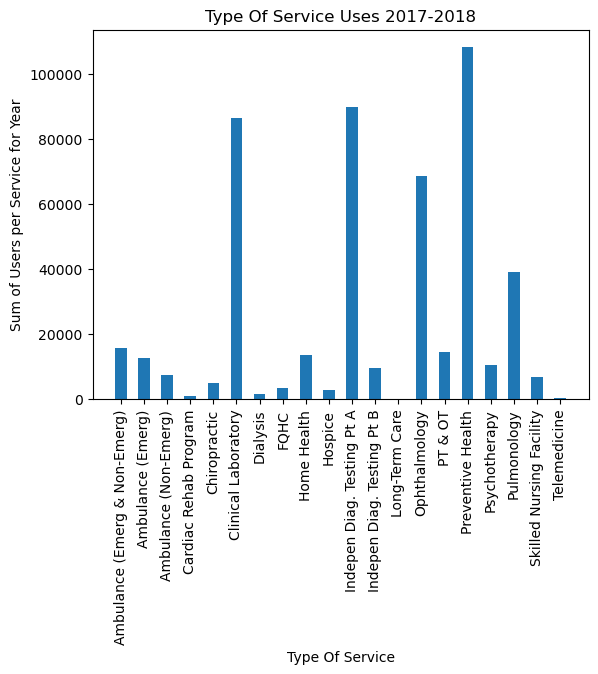

In [626]:
labels=['Ambulance (Emerg & Non-Emerg)', 'Ambulance (Emerg)', 'Ambulance (Non-Emerg)', 'Cardiac Rehab Program',
        'Chiropractic', 'Clinical Laboratory', 'Dialysis', 'FQHC',
        'Home Health','Hospice', 'Indepen Diag. Testing Pt A','Indepen Diag. Testing Pt B',
        'Long-Term Care', 'Ophthalmology', 'PT & OT', 'Preventive Health', 'Psychotherapy',
        'Pulmonology','Skilled Nursing Facility', 'Telemedicine']

eighteen_calendar_df=pd.DataFrame(VA_Cleaned.loc[VA_Cleaned["Date_Of_Use"]=="2017-10-01 to 2018-09-30"])
eighteen_calendar_df['Number_Of_Users'] = eighteen_calendar_df['Number_Of_Users'].str.replace(',', '').astype(int)

eighteen_grouped_service=eighteen_calendar_df.groupby(["Date_Of_Use", "Type_Of_Service"])["Number_Of_Users"].sum()
eighteen_grouped_service.dropna()

plt.bar(x=labels, height=eighteen_grouped_service, width=0.5)
plt.ylabel("Sum of Users per Service for Year")
plt.xlabel("Type Of Service")
plt.title("Type Of Service Uses 2017-2018")
#Rotate x-ticks to make more readable
plt.xticks(rotation=90)
plt.savefig("Type of Service Uses 2018")
plt.show()

In [627]:
#Calendar Year Pie graph sum of total spent
VA_Cleaned['Total_Payment'] = VA_Cleaned['Total_Payment'].str.replace(',', '')
VA_Cleaned['Total_Payment'] = VA_Cleaned['Total_Payment'].str.replace('$', '')

fifteen_calendar_df=pd.DataFrame(VA_Cleaned.loc[VA_Cleaned["Date_Of_Use"]=="2015-01-01 to 2015-12-31"])
sixteen_calendar_df=pd.DataFrame(VA_Cleaned.loc[VA_Cleaned["Date_Of_Use"]=="2016-01-01 to 2016-12-31"])
seventeen_calendar_df=pd.DataFrame(VA_Cleaned.loc[VA_Cleaned["Date_Of_Use"]=="2017-01-01 to 2017-12-31"])
eighteen_calendar_df=pd.DataFrame(VA_Cleaned.loc[VA_Cleaned["Date_Of_Use"]=="2017-10-01 to 2018-09-30"])

fifteen_calendar_df['Total_Payment'] = fifteen_calendar_df['Total_Payment'].astype(float).astype(int)
sixteen_calendar_df['Total_Payment'] = sixteen_calendar_df['Total_Payment'].astype(float).astype(int)
seventeen_calendar_df['Total_Payment'] = seventeen_calendar_df['Total_Payment'].astype(float).astype(int)
eighteen_calendar_df['Total_Payment'] = eighteen_calendar_df['Total_Payment'].astype(float).astype(int)

fifteen_total_payment=fifteen_calendar_df.groupby(["Date_Of_Use"])["Total_Payment"].sum()
sixteen_total_payment=sixteen_calendar_df.groupby(["Date_Of_Use"])["Total_Payment"].sum()
seventeen_total_payment=seventeen_calendar_df.groupby(["Date_Of_Use"])["Total_Payment"].sum()
seventeen_eighteen_total_payment=eighteen_calendar_df.groupby(["Date_Of_Use"])["Total_Payment"].sum()

fifteen_total_payment.dropna()
sixteen_total_payment.dropna()
seventeen_total_payment.dropna()
seventeen_eighteen_total_payment.dropna()


fifteen_df=pd.DataFrame(fifteen_total_payment)
sixteen_df=pd.DataFrame(sixteen_total_payment)
seventeen_df=pd.DataFrame(seventeen_total_payment)
seventeen_eighteen_df=pd.DataFrame(seventeen_eighteen_total_payment)

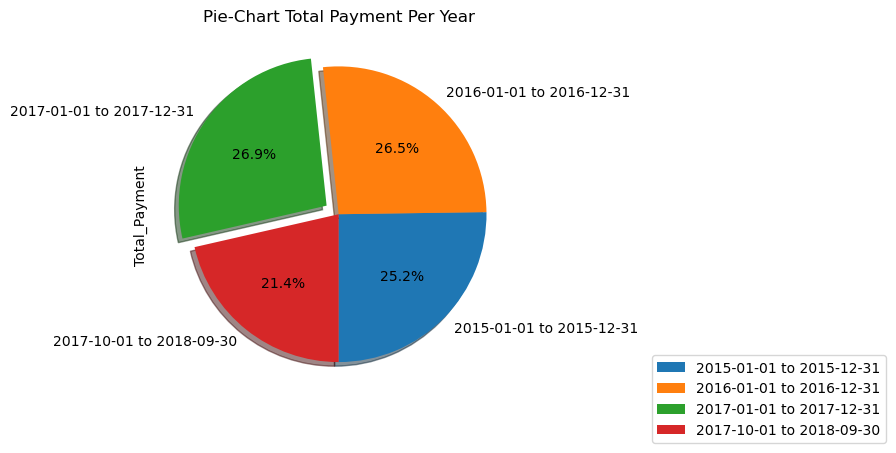

In [628]:
combined_years=pd.concat([fifteen_df, sixteen_df, seventeen_df, seventeen_eighteen_df])

combined_years.plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=10, subplots=True, shadow={'edgecolor':'black','shade':2.0 }, explode=(0, 0, 0.1, 0))
plt.legend(bbox_to_anchor=(2,0),loc="center right")
plt.title("Pie-Chart Total Payment Per Year")
plt.savefig("Total Payment Per Year")

In [629]:
VA_Cleaned['Total_Payment'] = VA_Cleaned['Total_Payment'].str.replace(',', '')
VA_Cleaned['Total_Payment'] = VA_Cleaned['Total_Payment'].str.replace('$', '')

seventeen_calendar_df=pd.DataFrame(VA_Cleaned.loc[VA_Cleaned["Date_Of_Use"]=="2017-01-01 to 2017-12-31"])

seventeen_calendar_df['Total_Payment'] = seventeen_calendar_df['Total_Payment'].astype(float).astype(int)

seventeen_total_payment=seventeen_calendar_df.groupby(["County"])["Total_Payment"].sum()

seventeen_total_payment.dropna()

seventeen_df=pd.DataFrame(seventeen_total_payment)
seventeen_df

,Total_Payment
County,
Bath,5941015
Botetourt,39855024
Henrico,248833714
Loudoun,155281839
Nelson,21764338
Newport News,143523927
Richmond,9991165
Roanoke,109554277
Rockingham,83587699


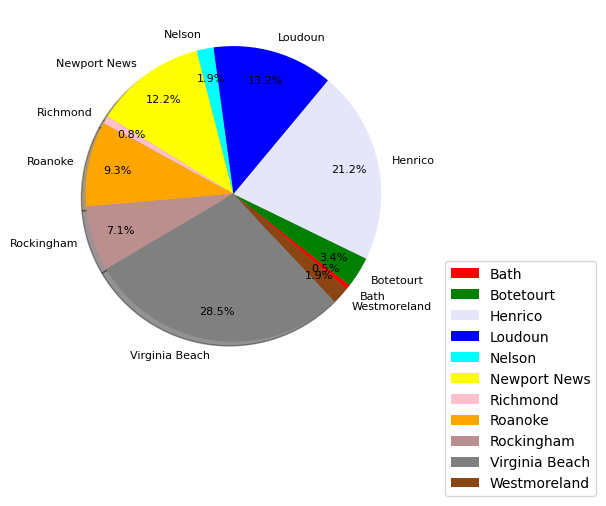

In [630]:
#Pie graph for Sum of Total Payment Per County
seventeen_df.plot(kind='pie', autopct='%1.1f%%', startangle=320, ylabel="", fontsize=8, labeldistance=1.1, pctdistance=0.8, subplots=True, colors=['red', 'green', 'lavender', 'blue', 'cyan', 'yellow', 'pink', 'orange', 'rosybrown', 'gray', 'saddlebrown'],shadow={'edgecolor':'black','shade':2.0 })
plt.legend(bbox_to_anchor=(1.5,0),loc="center right")
plt.savefig("Pie Chart- Total Payment Per Year")
plt.show()

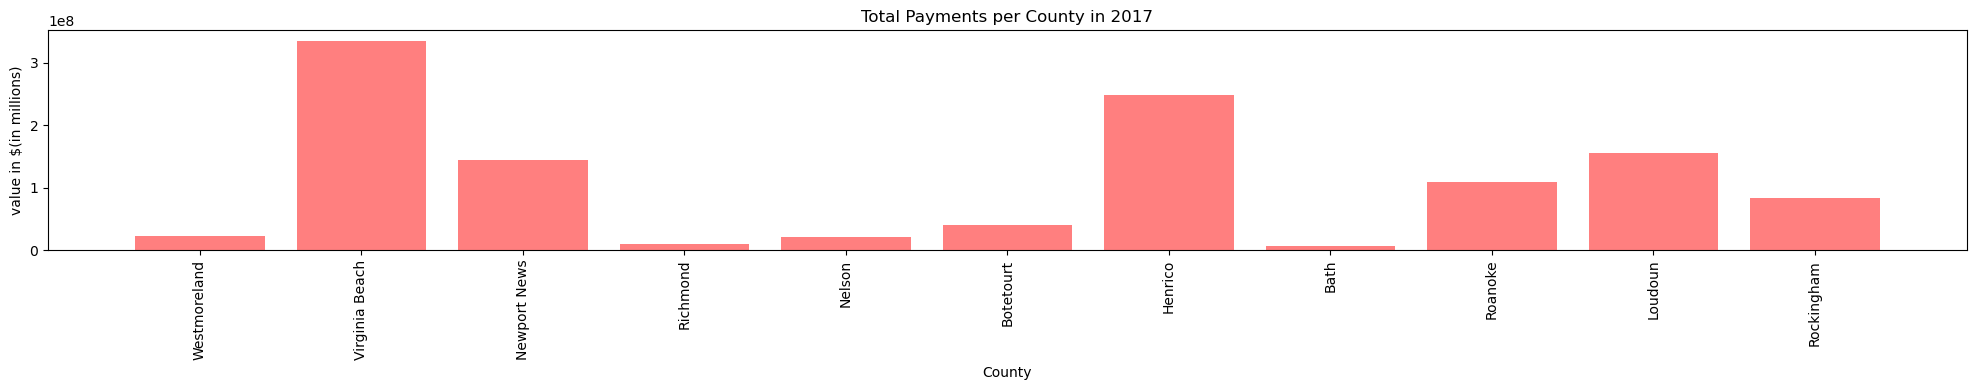

In [631]:
x_axis = np.arange(len(county_summary_df_17))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, county_summary_df_17["Total_Payments_Sum"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, county_summary_df_17["County"], rotation="vertical")
plt.ylabel('value in $(in millions)')
plt.xlabel("County")
plt.title("Total Payments per County in 2017")
plt.tight_layout()
plt.savefig("Total Payments per County in 2017.jpg")
plt.show()

In [632]:
import scipy.stats as stats

stats.ttest_ind(county_summary_df_17['Income_Per_Capita'], county_summary_df_17['Total_Payments_Sum'], equal_var=False)

TtestResult(statistic=-3.3040514378618706, pvalue=0.007958856579188213, df=10.000000280352063)

In [633]:
stats.ttest_ind(county_summary_df_17['Income_Per_Capita'], county_summary_df_17['Payments_Per_Capita'], equal_var=False)

TtestResult(statistic=12.700645849125397, pvalue=1.688190672219773e-07, df=10.013093091371411)